## <span style='color:red'>Final Project Submission</SPAN>

Please fill out:
* Student name: **Aaron Onserio**
* Student pace: **Full time**
* Scheduled project review date/time: **24th May 2023**
* Instructor name: **Lucille Kaleha, Nikita Njoroge, Samuel Karu**
* Blog post URL:

## <span style='color:blue'>USING MACHINE LEARNING TO PREDICT FUNCTIONALITY OF WATER WELLS IN TANZANIA.</SPAN>

![Water is essential for life](1.jpg)

#### Business Problem
Challenges like extreme weather events due to climate change unprecedented population growth, forest clearance and land demacatons have all contributed to water crises in many parts of Africa. Many people in Africa particularly in Tanzania are experiencing water access, sanitation and hygiene crises. Although challenging, the water crisis in Tanzania doesn’t define the country. Each day, parents are working hard to provide better lives for their children, and the country as a whole has seen steady fast growth over the last decade.

Tanzania has the largest population in East Africa currently at 64.51 million as per the Worldometer.info. Water is the basic essential need for human beings and yet more than half of the Tanzania poplulation have no access to clean drinking water. Ministry of Water and Sanitation in Tanzania has called for all inclusive and collaborative strategies to solve this problem and improve clean water sources. There are many water wells already established in Tanzania, yet some are completely not functioning, and need to be repaired. 


#### Business Objectives
Our main objective goal is to build a classification model that predicts the functionality of water points. We will recommend this predictive model to the authorities to help them  understand which water wells are (i) functional, (ii) nonfunctional, and (iii) functional but still need to be repaired. Our model assists the Tanzanian Ministry of Water and Sanitation in identifying wells that require maintenance and providing valuable insights for future well projects. By utilizing this model, we can guide Tanzanian authorities in maximizing the productivity of water sources and optimizing government investments in wells.


![Water](final.jpg)

#### My Approach
I am using this dataset to apply what I have learned in this phase ang gaurge my skill and knowledge in my Data Science immense program; Decision Trees, Logistic Regression, Random Forest, Bagging, GridSearchCV, AdaBoost, XGBoost and vector machine to perform a supervised machine learning algorithm. I will evaluate several algorithms with hyperparametor tuning to get a better sense of how various models performed given different inputs with different hyperparametor settings. I will apply accuracy, ROC-AUC and classification report to display my models performance. 


#### Data
The data used for this project is from the Data Driven website. The dataset contains nearly 60,000 entries rows and nearly 40 columns of water wells across Tanzania. Each record has information that includes various location data, technical specifications of the well, information about the water, etc. This website https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/ has all the information about the dataset. 


#### Challenges
This project involves datasets with nearly 40 features, some of which have more than 2000 unique values (e.g., installer, funder). As a student, I faced numerous challenges while learning to implement models using various algorithms. Additionally, I had to find ways to simplify the modeling process for better manageability.


#### Plan:
1. Understanding Data
2. Cleaning and Exploring Data
3. Preparing Data for Modeling
4. Finding a baseline model/ Binary regression
5. Do a Decision Tree, Logistic Regression, Random Forest Classification, integrate GridSearch in Pipeline, AdaBoost, XGBoost and Stack Regressions.
6. Results
7. Recommendation 
8. Next Step



#### Understanding Dataset

Column Descriptions:


| Features| Descriptions|
|---------| ------------|
|amount_tsh| - Total static head (amount water available to waterpoint)|
|date_recorded| - The date the row was entered|
|funder| - Who funded the well|
|gps_height| - Altitude of the well|
|installer| - Organization that installed the well|
|longitude| - GPS coordinate|
|latitude| - GPS coordinate|
|wpt_name| - Name of the waterpoint if there is one|
|num_private| -|
|basin |- Geographic water basin|
|subvillage| - Geographic |
|region |- Geographic location|
|region_code| - Geographic location (coded)|
|district_code| - Geographic location (coded)|
|lga| - Geographic location|
|ward| - Geographic location|
|population| - Population around the well|
|public_meeting| - True/False|
|recorded_by| - Group entering this row of data|
|scheme_management| - Who operates the waterpoint|
|scheme_name| - Who operates the waterpoint|
|permit| - If the waterpoint is permitted|
|construction_year| - Year the waterpoint was constructed|
|extraction_type| - The kind of extraction the waterpoint uses|
|extraction_type_class| - The kind of extraction the waterpoint uses|
|management| - How the waterpoint is managed|
|management_group| - How the waterpoint is managed|
|payment| - What the water costs|
|payment_type| - What the water costs|
|water_quality |- The quality of the water|
|quality_group| - The quality of the water|
|quantity| - The quantity of water|
|quantity_group| - The quantity of water|
|source| - The source of the water|
|source_type| - The source of the water|
|source_class| - The source of the water|
|waterpoint_type| - The kind of waterpoint|
|waterpoint_type_group| - The kind of waterpoint|

### <span style='color:purple'> Data Loading</SPAN>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
# import display that can display maximum columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

In [3]:
# Loading dataset for train values
train_values = pd.read_csv('Training_set_values.csv')

In [4]:
# Loading target dataset
train_labels = pd.read_csv('Trainig_set_labels.csv')

#### Data Understanding

In [5]:
# Checking the value value counts for the target
train_labels.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

#### Label Encode Target Variables
To better define the status of each well for this analysis, I have set up a binary system for the wells:

0 = Functional

1 = Needs Repair

In [6]:
# Do LabalEncode on the target variables and value count then normalize them
y_encoded = pd.DataFrame(LabelEncoder().fit_transform(train_labels['status_group']))
y_encoded.value_counts(normalize=True)

0    0.543081
2    0.384242
1    0.072677
dtype: float64

In [7]:
# Setting up a binary system for the wells.
y_encoded = y_encoded.replace(2, 1)
y_encoded.value_counts(normalize=True)

0    0.543081
1    0.456919
dtype: float64

### Concatinate the two datasets

In [8]:
# Concatinating the encoded data and the training data and put then in a DataFrame
data_train = pd.concat([train_values, y_encoded], axis=1)

# Giving the target column a name
data_train.rename(mapper={0:'status_group'}, axis=1, inplace=True)

In [9]:
# Value counts for the target variables
data_train.status_group.value_counts()

0    32259
1    27141
Name: status_group, dtype: int64

In [10]:
# Cheking general information for the dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
# Checking for the missing values and summing them up
data_train.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

From the information results above some the important feature that are in integer form or int64 dtype will be converted into string or object form at the stage of data cleaning and preprocessing. The Null values will also be dropped of filled depending on the project goals.   

### Data Exploration Analysis (EDA)

#### Data Preprocessing/Cleaning

In [12]:
# Function that can be used to check and change the data types
def change_data_type(data, col_list, dtype):
    for col in data.columns:
        if col in col_list:
            data[col] = data[col].astype(dtype)
    return data

In [13]:
# Chenge some datatype for some columns to strings/obect
col_to_change = ['id', 'region_code', 'district_code', 'construction_year', 'status_group']

In [14]:
data_train = change_data_type(data_train, col_to_change, 'str')

In [15]:
# Checking for the general information to see if the changes have been effected
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  object 
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  object 
 14  district_code          59400 non-null  object 
 15  lg

In [16]:
# creating a class for replacement
class DataReplacer:
    # initialize the constructor
    def __init__(self, data):
        self.data = data
    def replace_value(self, col_name, to_replace, value):
        self.data[col_name].replace(to_replace=to_replace, value=value, inplace=True)
        
# Create an instance of DataReplacer
replacer = DataReplacer(data_train)

In [17]:
replacer.replace_value('construction_year', '0', 'Missing')

Creating a function that will convert lower and upper case strings and remove spaces and other character in the entries

In [18]:
# Creating the function for cleaning or removing spaces, lower anf upper case ans other charactors some columns
def string_field_cleanup(data, cols):
    
    for col in cols:
        
        # set all to lowercase:
        data[col] = data[col].str.lower()

        # replace spaces within text with _
        data[col] = data[col].str.replace(' ', '_')

        # remove all non-alphanumeric characters:
        data[col] = data[col].str.replace('\W', '')
        
        # remove quotation marks
        data[col] = data[col].str.strip("\"")
        
    return data

In [19]:
cols_to_clean = ['installer', 'funder', 'wpt_name', 'subvillage', 'scheme_name', 'scheme_management', 'management', 'management_group']

In [20]:
data_train = string_field_cleanup(data_train, cols_to_clean)

### <span style='color:green'>Visualization</SPAN>

We are going to group the data_train by the columns 'status_group' and 'extraction_type_class' and counts the occurrences of each combination. We will reshape the result into a new DataFrame called 'df_status' using the unstack() method.

Then, we will plot the 'df_status' DataFrame as a stacked bar chart using the plot() function with the parameters 'kind' set to 'bar', 'stacked' set to True, and 'figsize' set to (10, 6).

extraction_type_class,gravity,handpump,motorpump,other,rope pump,submersible,wind-powered
status_group,,,,,,,
0,16048,10375,1135,1029,293,3329,50
1,10732,6081,1852,5401,158,2850,67


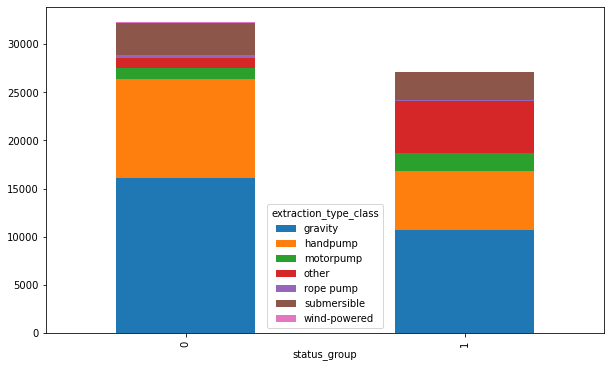

In [21]:
df_status = data_train.groupby(['status_group', 'extraction_type_class'])['status_group'].count().unstack('extraction_type_class')
df_status.plot(kind='bar', stacked=True, figsize=(10,6))
df_status

Below cells we will be creating functions that will help us to plot various graphs for various features in our dataset.

Creating function that will group the dataframe by the primary and secondary columns of interest, sort the groups by columns, calculate the percentage values for each status_group with each feature grouping and create a bar chart for each status_group using selected features.

In [22]:

def dataset_eda_subset(df, col1, col2='status_group', sort_by='id', figsize=(12, 6), m=0, n=20, 
                       legend=True, legend_loc='best', legend_cols=1, rotation=45, width=0.8,
                       colors=['#019600', '#800080'], alpha=0.8, fontsize=14):
    
    df_subset = data_train.copy()
    
    # Create dataframe grouped by primary variable of interest, sorted by number of projects (greatest number to fewest)
    df_subset_grpd = df_subset.groupby(col1).count().sort_values(by=sort_by, ascending=False).reset_index()
    
    # Convert sorted variable column to list
    sorted_list = df_subset_grpd[col1].tolist()
    
    # Convert column of primary variable of interest to categorical, to maintain sort order
    df_subset[col1] = df_subset[col1].astype('category').cat.set_categories(sorted_list)
    
    # group dataframe by primary and secondary columns of interest
    df_subset_grpd = df_subset.groupby([col1, col2])[col1].count().unstack(col2)
    
    # Plot the stacked bar graph
    ax = df_subset_grpd[m:n].plot(kind='bar', stacked=True, figsize=figsize, color=colors, 
                                  alpha=alpha, fontsize=fontsize, width=width, legend=legend)
    
    # Set legend properties
    ax.legend(loc=legend_loc, ncol=legend_cols, fontsize=12) if legend else None
    
    # Set axis labels, title, and tick labels
    ax.set_xlabel(f"{col1}: m = {m} through n = {n}", fontsize=fontsize, labelpad=18)
    ax.set_ylabel("Number of wells", fontsize=fontsize, labelpad=18)
    plt.setp(ax.get_xticklabels(), rotation=rotation, horizontalalignment='right', fontsize=fontsize)
    ax.set_title(label=f"{col2} by {col1}", fontsize=fontsize)
    
    return df_subset_grpd[m:n]


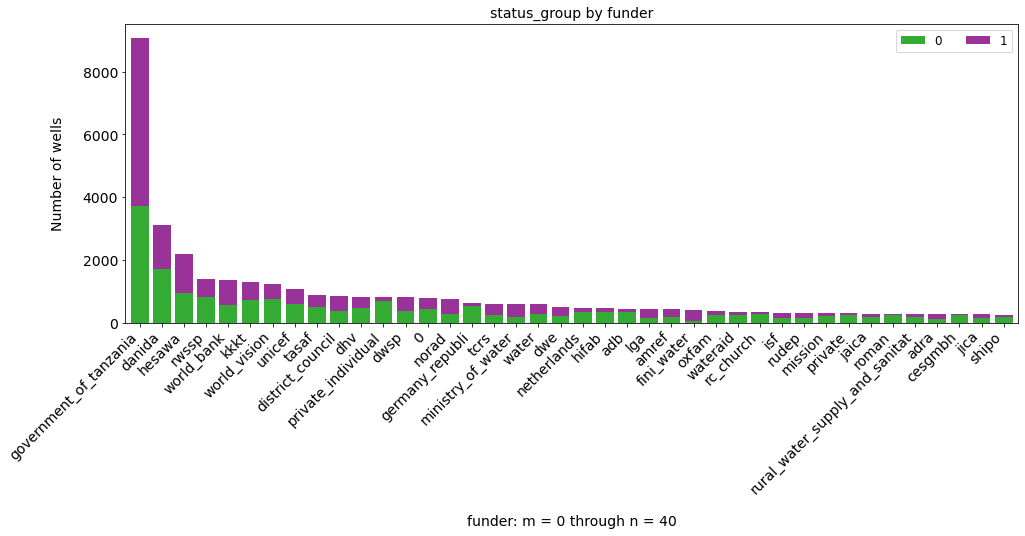

In [23]:
# Plotting a barchart to display number of wells per funder
top_funders_pct = dataset_eda_subset(data_train, col1='funder', col2='status_group', 
                                           m=0, n=40, figsize=(16, 5.5), legend_cols=3)

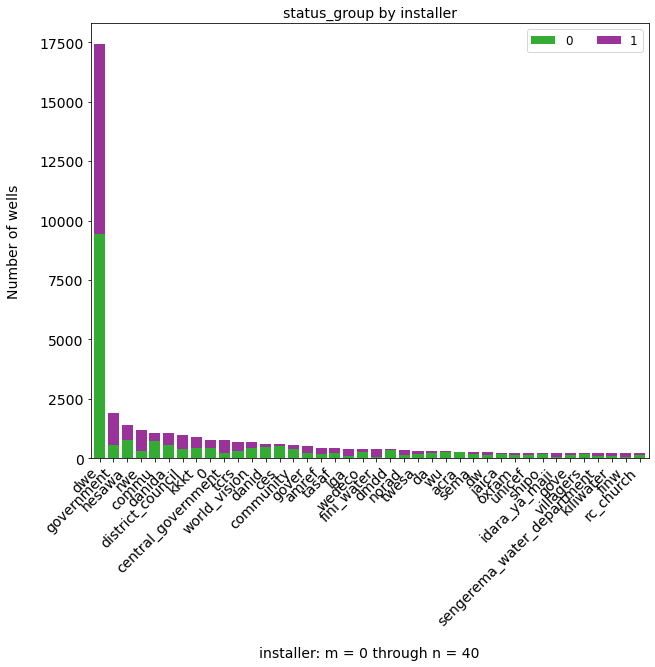

In [24]:
# Displying of the number of well per indtaller
top_installers = dataset_eda_subset(data_train, col1='installer', col2='status_group', 
                                           m=0, n=40, figsize=(10,8), legend_cols=3)

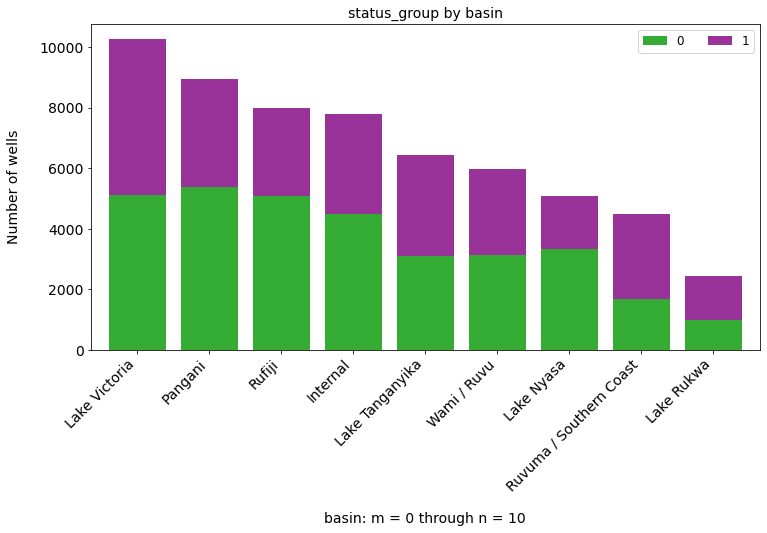

In [25]:
# Displaying number of wells per basin
status_by_basin = dataset_eda_subset(data_train, col1='basin', col2='status_group', n=10, legend_cols=3)

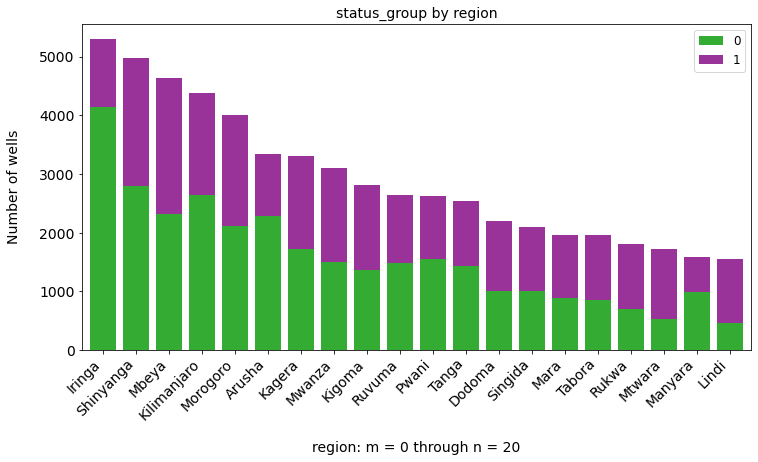

In [26]:
# Barchar displaying number of wells per region
status_by_region = dataset_eda_subset(data_train, col1='region', col2='status_group', n=20)


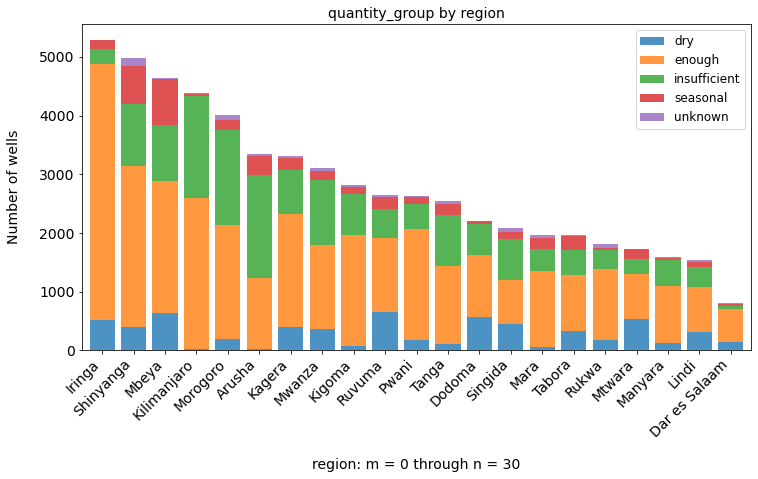

In [27]:
# Displaying quantity of water per region
quantity_region = dataset_eda_subset(data_train, col1='region', col2='quantity_group', m=0, n=30, 
                                legend=True, colors=None)

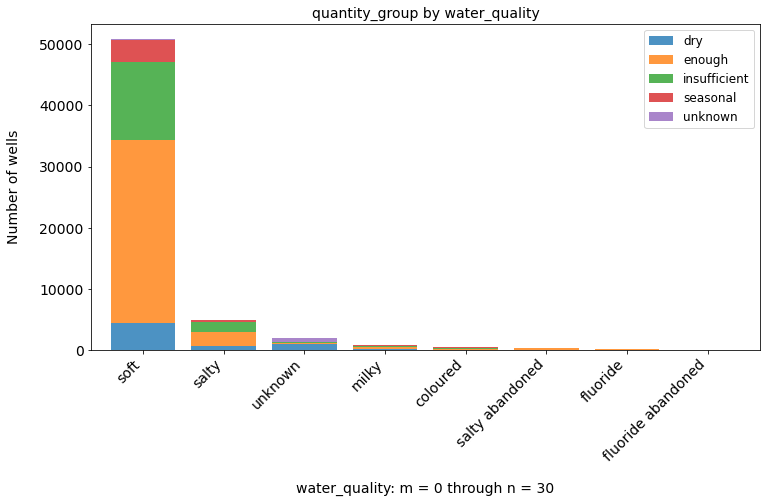

In [28]:
# Displaying water quality
quality_water = dataset_eda_subset(data_train, col1='water_quality', col2='quantity_group', m=0, n=30, 
                                legend=True, colors=None)

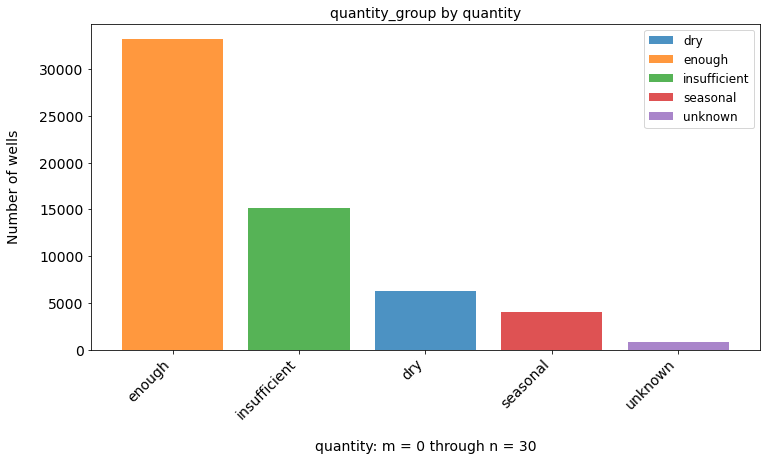

In [29]:
quantity_water = dataset_eda_subset(data_train, col1='quantity', col2='quantity_group', m=0, n=30, 
                                legend=True, colors=None)

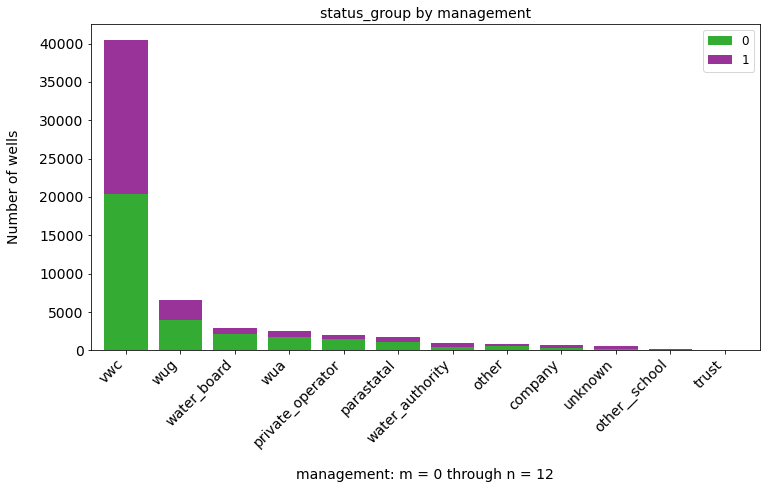

In [30]:
# Showing the wells per management vs status_group
status_by_mgmt = dataset_eda_subset(data_train, col1='management', col2='status_group', n=12)


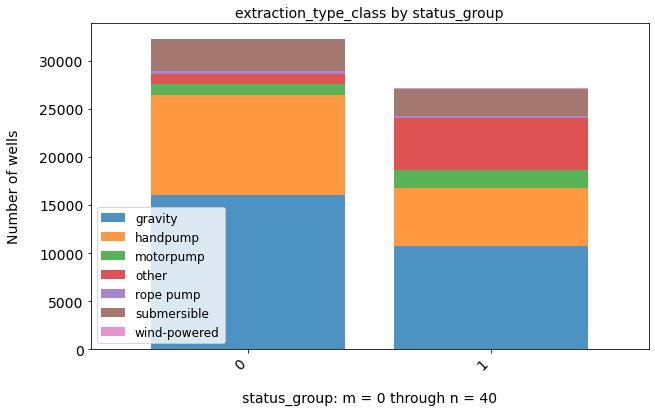

In [31]:
# Showing extraction class by status group
extr_class = dataset_eda_subset(data_train, col1='status_group',
                                       col2='extraction_type_class', 
                                       m=0, n=40, figsize=(10, 6), 
                                       legend=True, colors=None, 
                                       rotation=45, fontsize=14)

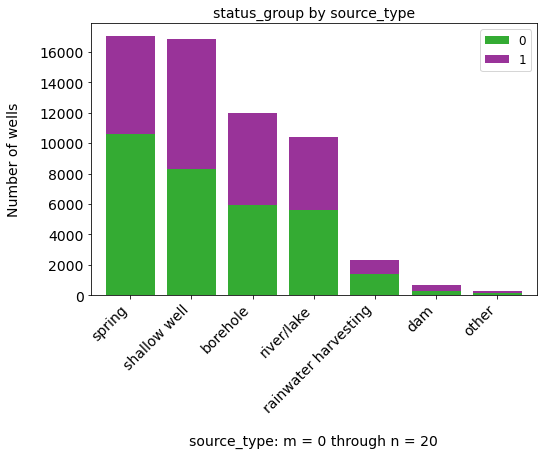

In [32]:
# Showing status group by source type
status_by_source_type = dataset_eda_subset(data_train, col1='source_type', 
                                           figsize=(8, 5), col2='status_group', n=20)

Boxplot for the Population as per our target/status_group

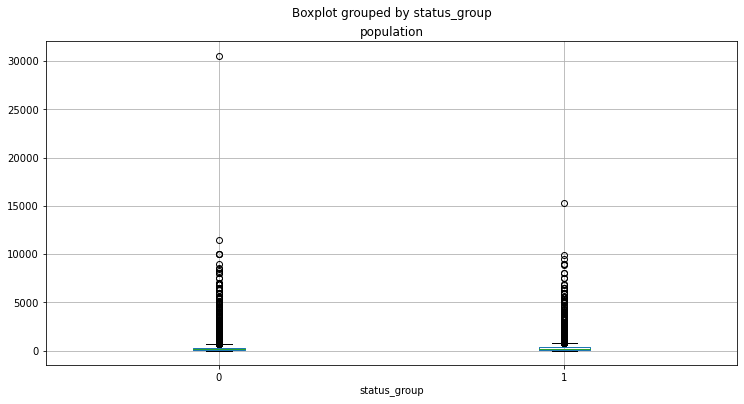

In [33]:
# A box plot grouped by status vs population
popn_not_zero = data_train[data_train['population'] > 0]
popn_not_zero.boxplot(column='population', by='status_group', figsize=(12, 6));


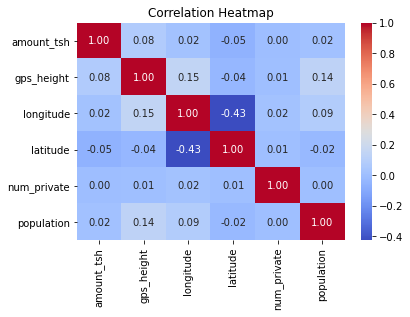

In [34]:

# Compute the correlation matrix
correlation_matrix = data_train.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()


### <span style = 'color:blue'>Data Preperation for modeling</SPAN>

Looking at my dataset, there are some many columns with problems in data intergrity like missing values, or unclearly labeling for instance, 'amount_tsh', 'recorded_by', 'num_private' ect. Some do not add anything because they are duplicate of the others but with different column name. For the interest of time, some will note be utilized at this time like 'gps_height', 'longitude', 'latitude' etc. Others may lead to potential collinearity problems (for instance, 'district_code' vs. other geographic locators; 'source' over 'source_type'; 'management' over 'scheme_management' or 'management_group')
Due to bulkness of the dataset I will select some important features to work with and drop some for various reasons. 

**Addressing Missing Values**

The remaining features will have their information imputed based on the most frequent value in each category. I have decided to impute rather than drop the rows because each of the remaining features with missing values has a clearly identified 'most frequent' unique value. Also, in order to maintain the size and integrity of the dataset.

In order to avoid potential data leakage from imputing these values, the missing data will be replaced later in this analysis through a SimpleImputer in a pipeline after splitting training and test data.

In [35]:
cols_to_drop = ['scheme_name', 'id', 'date_recorded', 'region', 'funder', 'recorded_by'
                , 'wpt_name', 'subvillage', 'ward', 'lga', 'basin', 'quality_group', 
                'quantity_group', 'installer', 'source_type', 'source_class', 
                'waterpoint_type_group', 'extraction_type_group', 
                'extraction_type_class', 'management_group', 'payment_type']

#### Creating new DataFrame
The DataFrame for clean Data to be used for modeling 

In [36]:
df = data_train.drop(cols_to_drop, axis=1)
df.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,True,vwc,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,0
1,0.0,1399,34.698766,-2.147466,0,20,2,280,NaN,other,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,0
2,25.0,686,37.460664,-3.821329,0,21,4,250,True,vwc,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,0
3,0.0,263,38.486161,-11.155298,0,90,63,58,True,vwc,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,1
4,0.0,0,31.130847,-1.825359,0,18,1,0,True,NaN,True,Missing,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,0


In [37]:
df.shape

(59400, 20)

In [38]:
# General information for our new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   gps_height         59400 non-null  int64  
 2   longitude          59400 non-null  float64
 3   latitude           59400 non-null  float64
 4   num_private        59400 non-null  int64  
 5   region_code        59400 non-null  object 
 6   district_code      59400 non-null  object 
 7   population         59400 non-null  int64  
 8   public_meeting     56066 non-null  object 
 9   scheme_management  55523 non-null  object 
 10  permit             56344 non-null  object 
 11  construction_year  59400 non-null  object 
 12  extraction_type    59400 non-null  object 
 13  management         59400 non-null  object 
 14  payment            59400 non-null  object 
 15  water_quality      59400 non-null  object 
 16  quantity           594

In [39]:
# converting the columns in to obects
to_object = ['region_code', 'district_code']
df_clean = df.copy()

for obj in to_object:
    df_clean[obj] = df_clean[obj].astype(object)

In [40]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,population
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,179.909983
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,471.482176
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,25.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,215.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,30500.000000


### <span style='color:orange'>Modeling</SPAN>

### Import necessary libraries and function for modeling and evaluation

In [41]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer,  make_column_selector as selector
from sklearn.ensemble import StackingClassifier,  RandomForestClassifier, \
AdaBoostClassifier, GradientBoostingClassifier 
import xgboost
import warnings
warnings.filterwarnings("ignore")

#### Splitting Data


Now my dataset looks clean, and ready for the next step. First I will need to identify the target variable and the features veriable then divide the data into testing size of 25% and a random state of 42. 

In [42]:
# Define the target and feature variable
y = df['status_group']
X = df.drop(['status_group'], axis =1)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [43]:
# Convert string labels to numeric values
y_train_numeric = np.array([int(label) for label in y_train])
# Convert string labels to numeric values
y_test_numeric = np.array([int(label) for label in y_test])

**Setting up Pipelines**

I will go ahead and greate a pipeline that will help to prevent data leakage and ensure that all preprocessing steps are completed with each step and streamline data analysis. 

Pipeline will help to seperate the numeric data from categorical data then they can undergo seperate preprocessing.

1. Numerical Data:

The columns for numerical data or not missing any values so there is no need to include an imputer.
**StandardScaler** is used here to standardize and scale all numerical data.

2. Categorical Data:

**SimpleImputer** is used here to fill missing data in the categorical columns based on the most frequent value within that column. A 'missing' indicator is in place to help identify that the data was not originally found within the dataset.

**OneHotEncoder** is being utilized to convert the categorical information to a binary system for modeling.

### <span style='color:red'>Base Model</SPAN>
#### Decision Tree Model

>Base model is the first simple model or the bare minimum model that predicts the most frequent target variable.

### Creating a Class for reading the accuracy, ROC-AUC and plotting the ROC-AUC Curves

In [46]:
class ModelEvaluator:
    def __init__(self, model):
        self.model = model
        
    # A function to return accuracy and ROC-AUC
    def evaluate(self, X_train, y_train, X_test, y_test):
        train_accuracy = accuracy_score(y_train, self.model.predict(X_train))
        test_accuracy = accuracy_score(y_test, self.model.predict(X_test))
        train_roc_auc = roc_auc_score(y_train, self.model.predict_proba(X_train)[:, 1])
        test_roc_auc = roc_auc_score(y_test, self.model.predict_proba(X_test)[:, 1])
        return train_accuracy, test_accuracy, train_roc_auc, test_roc_auc

    #A function to plot the ROC-AUC curve
    def plot_roc_curve(self, X_train, y_train, X_test, y_test):
        train_fpr, train_tpr, train_thresholds = roc_curve(y_train, self.model.predict_proba(X_train)[:, 1])
        test_fpr, test_tpr, test_thresholds = roc_curve(y_test, self.model.predict_proba(X_test)[:, 1])
        
        # Design the graph
        plt.plot(train_fpr, train_tpr, label='Train ROC Curve')
        plt.plot(test_fpr, test_tpr, label='Test ROC Curve')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

In [47]:
# Instantiating a Pipeline for numerical values
num_pipe = Pipeline([
    ('scaler', StandardScaler())])

# Pipeline for categorical values
cat_pipe = Pipeline([
    ('cat_impute', SimpleImputer(strategy='most_frequent', add_indicator=True)),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

# Bringing all together
ColTrans = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe, selector(dtype_include=np.number)),
    ('cat_pipe', cat_pipe, selector(dtype_include=object))
], remainder='passthrough')

In [48]:
# Instantiating  Decision Tree Classifier
tree_model = Pipeline([
    ('ColTrans', ColTrans),
    ('tree', DecisionTreeClassifier(criterion='entropy', random_state=42))
])

In [49]:
# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the training data
tree_model.fit(X_train, y_train);

Train Accuracy: 0.9957575757575757
Test Accuracy: 0.7838383838383839
Train ROC-AUC: 0.9999479810577768
Test ROC-AUC: 0.7831405149185511


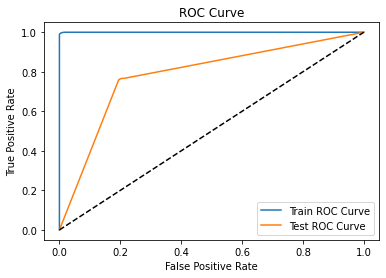

In [50]:

evaluator = ModelEvaluator(tree_model)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [51]:
# Make predictions using test set 
y_pred_train = tree_model.predict(X_train)

y_pred_test = tree_model.predict(X_test)

In [52]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_test))

Training Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24161
           1       1.00      0.99      1.00     20389

    accuracy                           1.00     44550
   macro avg       1.00      1.00      1.00     44550
weighted avg       1.00      1.00      1.00     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8098
           1       0.76      0.76      0.76      6752

    accuracy                           0.78     14850
   macro avg       0.78      0.78      0.78     14850
weighted avg       0.78      0.78      0.78     14850



>* My firts tree model has an accuracy score of 100% on the training. But the score of the tree model on the test set is 78%. This indicate overfitting to the training test. 


### Decision Tree GridSearchCV

>My Decision Tree Model indicated an overfitting. This prompt me to adjust some hyperparameters. 

In [53]:
# Create the pipeline
pipeline = Pipeline([
    ('ColTrans', ColumnTransformer(transformers=[
    ('num_pipe', num_pipe, selector(dtype_include=np.number)),
    ('cat_pipe', cat_pipe, selector(dtype_include=object))
], remainder='passthrough')),
    ('tree', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid
param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [8, 16, 36]
}

# Create the grid search object
tree_model2 = GridSearchCV(pipeline, param_grid, cv=3)


# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the grid search on the training data
tree_model2.fit(X_train, y_train);


Train Accuracy: 0.9774186307519641
Test Accuracy: 0.7847811447811448
Train ROC-AUC: 0.9986988595999686
Test ROC-AUC: 0.7920013034199541


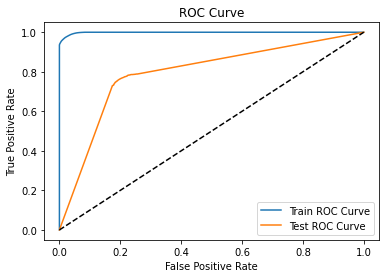

In [54]:
evaluator = ModelEvaluator(tree_model2)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [55]:
# Make predictions using test set 
y_pred2_train = tree_model2.predict(X_train)

y_pred2_test = tree_model2.predict(X_test)

In [56]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred2_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred2_test))

Training Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     24161
           1       0.98      0.97      0.98     20389

    accuracy                           0.98     44550
   macro avg       0.98      0.98      0.98     44550
weighted avg       0.98      0.98      0.98     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      8098
           1       0.77      0.76      0.76      6752

    accuracy                           0.78     14850
   macro avg       0.78      0.78      0.78     14850
weighted avg       0.78      0.78      0.78     14850



In [57]:
tree_model2.best_score_

0.7729517396184064

In [58]:
tree_model2.best_estimator_.score(X_test,y_test)

0.7847811447811448

>The first GridSearch Decision Tree still shows overffiting in the training dataset. I will go ahead and adjust more hyperparametors to tune the model.

#### GridSearchCV Decision Tree 2

In [59]:
# Create the pipeline
pipeline = Pipeline([
    ('ColTrans', ColumnTransformer(transformers=[
    ('num_pipe', num_pipe, selector(dtype_include=np.number)),
    ('cat_pipe', cat_pipe, selector(dtype_include=object))
], remainder='passthrough')),
    ('tree', DecisionTreeClassifier(random_state=42))
])

# Define the parameter grid
param_grid = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [34, 35, 36], 
    'tree__min_samples_split': [2, 5, 10]
}

# Create the grid search object
tree_model3 = GridSearchCV(pipeline, param_grid, cv=3)

# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the grid search on the training data
tree_model3.fit(X_train, y_train);

Train Accuracy: 0.9289786756453423
Test Accuracy: 0.781077441077441
Train ROC-AUC: 0.9863411742798709
Test ROC-AUC: 0.8208075556073176


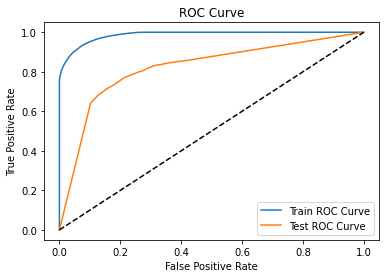

In [60]:
evaluator = ModelEvaluator(tree_model3)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [61]:
tree_model3.best_params_

{'tree__criterion': 'gini',
 'tree__max_depth': 34,
 'tree__min_samples_split': 10}

>There is some improvement in reducing the overfitting in this mode but still the overfitting is significant in the training set with accuracy of 93% in the training set and 78% in the testing set. The ROC-AUC is also significantly higher in the training set at 97% while that of the testing set is 82%

#### Final Decision Tree 

In [62]:
tree_model_final = Pipeline([
    ('ColTrans', ColTrans),
    ('tree', DecisionTreeClassifier(criterion='gini', max_depth=34, 
                                   min_samples_split=10, random_state=42))
])

In [63]:
# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
tree_model_final.fit(X_train, y_train)


Pipeline(steps=[('ColTrans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027F73C9A190>),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
           

Train Accuracy: 0.9289786756453423
Test Accuracy: 0.781077441077441
Train ROC-AUC: 0.9863411742798709
Test ROC-AUC: 0.8208075556073176


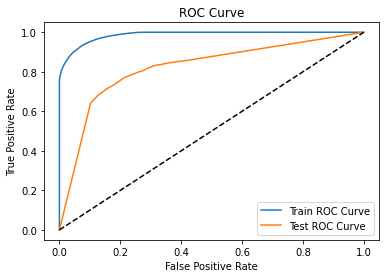

In [64]:
evaluator = ModelEvaluator(tree_model_final)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [65]:
# Make predictions using test set 
y_pred_final_train = tree_model_final.predict(X_train)

y_pred_final_test = tree_model_final.predict(X_test)


In [66]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_final_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_final_test))

Training Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     24161
           1       0.94      0.90      0.92     20389

    accuracy                           0.93     44550
   macro avg       0.93      0.93      0.93     44550
weighted avg       0.93      0.93      0.93     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      8098
           1       0.77      0.74      0.75      6752

    accuracy                           0.78     14850
   macro avg       0.78      0.78      0.78     14850
weighted avg       0.78      0.78      0.78     14850



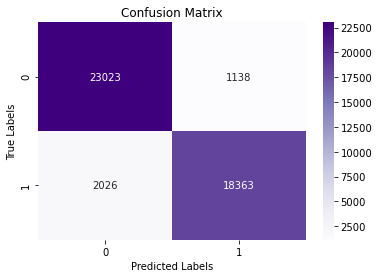

In [67]:
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_final_train)

# Create a figure and axes for the confusion matrix plot
fig, ax = plt.subplots(figsize=(6,4))

# Create the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=True, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
# Display the plot
plt.show();

>The Final Decision Tree Model does not change much from the baseline decision tree model.

### Random Forest


In [68]:
rf_model = Pipeline([
    ('ColTrans', ColTrans),
    ('rf', RandomForestClassifier(random_state=42))
])

In [69]:
# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
rf_model.fit(X_train, y_train);

Train Accuracy: 0.9957126823793491
Test Accuracy: 0.8185185185185185
Train ROC-AUC: 0.9993482219690885
Test ROC-AUC: 0.895164200042372


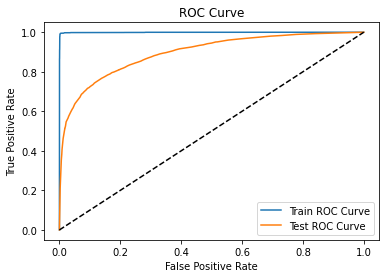

In [70]:
evaluator = ModelEvaluator(rf_model)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [71]:
# Make predictions using test set 
y_pred_train = rf_model.predict(X_train)

y_pred_test = rf_model.predict(X_test)

In [72]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_test))

Training Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24161
           1       1.00      0.99      1.00     20389

    accuracy                           1.00     44550
   macro avg       1.00      1.00      1.00     44550
weighted avg       1.00      1.00      1.00     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      8098
           1       0.82      0.77      0.79      6752

    accuracy                           0.82     14850
   macro avg       0.82      0.81      0.82     14850
weighted avg       0.82      0.82      0.82     14850



>My random forest model has 100% accuracy for the train data while the test results have an accuracy of 82%. 

>The model is overfitted and I will adjust the hyperparameters through gridsearch to reduce the overfitting.

### Random Forest GridSearchCV

>I am start the GridSearchCV with 'criterion' and 'max_depth'.

In [73]:
rf_params = {
    'rf__criterion':["gini", "entropy", 'log_loss'],
    'rf__max_depth':[4, 16, 32, None]
}
rf_gs = GridSearchCV(estimator=rf_model, 
                     param_grid=rf_params, 
                     cv=5, 
                     verbose=1,
                     n_jobs=2)

# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
rf_gs.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.1min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  5.5min finished


Train Accuracy: 0.986307519640853
Test Accuracy: 0.8208754208754209
Train ROC-AUC: 0.9987387474540675
Test ROC-AUC: 0.8992548808201428


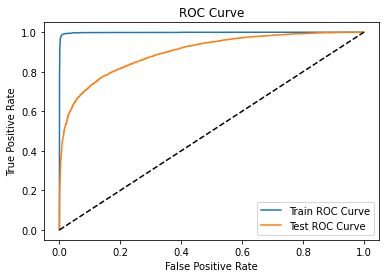

In [74]:
evaluator = ModelEvaluator(rf_gs)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [75]:
# Make predictions using test set 
y_pred_gs_train = rf_gs.predict(X_train)

y_pred_gs_test = rf_gs.predict(X_test)

In [76]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_gs_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_gs_test))

Training Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     24161
           1       1.00      0.97      0.98     20389

    accuracy                           0.99     44550
   macro avg       0.99      0.99      0.99     44550
weighted avg       0.99      0.99      0.99     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      8098
           1       0.83      0.76      0.80      6752

    accuracy                           0.82     14850
   macro avg       0.82      0.82      0.82     14850
weighted avg       0.82      0.82      0.82     14850



In [77]:
rf_gs.best_params_

{'rf__criterion': 'entropy', 'rf__max_depth': 32}

#### Second Random Forest GridSearchCV

>After running the first GridSearchCV, my model was still overfitting, but criterion: entropy was found to be the best parametor and the max_depth of 32. I will adjust the max depth closer to 32 to see how it compares. I will also look to adjust max_features to attempt to tune the forest further.



In [78]:
# setting basic parameter
rf_params2 = {
    'rf__criterion':["entropy"],
    'rf__max_depth':[31, 32, 33],
    'rf__max_features': ['auto', 'log2', None, .5]
}

# Creating the GridSearchCV as the rf model as the estomator
rf_gs2 = GridSearchCV(estimator=rf_model, 
                      param_grid=rf_params2, 
                      cv=5, 
                      verbose=1,
                      n_jobs=2)


# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit model
rf_gs2.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 26.7min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed: 38.6min finished


Train Accuracy: 0.9828507295173962
Test Accuracy: 0.8208754208754209
Train ROC-AUC: 0.9985025261803486
Test ROC-AUC: 0.8998448197232013


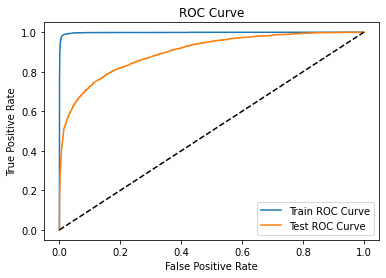

In [79]:
evaluator = ModelEvaluator(rf_gs2)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [80]:
rf_gs2.best_params_

{'rf__criterion': 'entropy', 'rf__max_depth': 31, 'rf__max_features': 'auto'}

In [81]:
rf_gs2.best_score_

0.82

In [82]:
rf_gs2.best_estimator_.score(X_test,y_test)

0.8208754208754209

In [83]:
# Make predictions using test set 
y_pred_gs2_train = rf_gs2.predict(X_train)

y_pred_gs2_test = rf_gs2.predict(X_test)

In [84]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_gs2_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_gs2_test))

Training Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     24161
           1       0.99      0.97      0.98     20389

    accuracy                           0.98     44550
   macro avg       0.98      0.98      0.98     44550
weighted avg       0.98      0.98      0.98     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      8098
           1       0.83      0.76      0.79      6752

    accuracy                           0.82     14850
   macro avg       0.82      0.82      0.82     14850
weighted avg       0.82      0.82      0.82     14850



>After adjusting the hyperparamentors there was no much change in tis model. Due to time I will procede with the best parametors from this model to fine tune it to the final model. 

#### Final Random Forest Model

In [85]:
# Creatinf a Pipeline
rf_model_final = Pipeline([
    ('ColTrans', ColTrans),
    ('rf', RandomForestClassifier(criterion='entropy', max_depth=31, 
                                  max_features='auto', random_state=42))
])


# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
rf_model_final.fit(X_train, y_train);

Train Accuracy: 0.9828507295173962
Test Accuracy: 0.8208754208754209
Train ROC-AUC: 0.9985025261803486
Test ROC-AUC: 0.8998448197232013


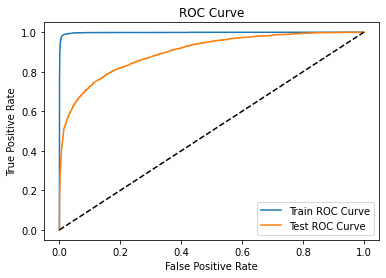

In [86]:
evaluator = ModelEvaluator(rf_model_final)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [87]:
# Make predictions using test set 
y_pred_final_train = rf_model_final.predict(X_train)

y_pred_final_test = rf_model_final.predict(X_test)

In [88]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_final_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_final_test))

Training Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     24161
           1       0.99      0.97      0.98     20389

    accuracy                           0.98     44550
   macro avg       0.98      0.98      0.98     44550
weighted avg       0.98      0.98      0.98     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      8098
           1       0.83      0.76      0.79      6752

    accuracy                           0.82     14850
   macro avg       0.82      0.82      0.82     14850
weighted avg       0.82      0.82      0.82     14850



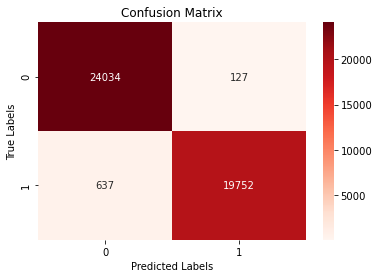

In [89]:
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_final_train)

# Create a figure and axes for the confusion matrix plot
fig, ax = plt.subplots(figsize=(6,4))

# Create the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=True, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
# Display the plot
plt.show();

>The was no much difference between the final model in Random Forest Model and our base model.The model is still overfitting the training but given time I can fine tune it more.  

### Logistic Regression

In [90]:
# Creating a Pipeline
log_reg_model = Pipeline([
    ('ColTrans', ColTrans),
    ('logreg', LogisticRegression(random_state=42))
])

In [91]:
# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
log_reg_model.fit(X_train, y_train);

Train Accuracy: 0.7608529741863075
Test Accuracy: 0.7537373737373737
Train ROC-AUC: 0.8354926352166028
Test ROC-AUC: 0.8290780668592912


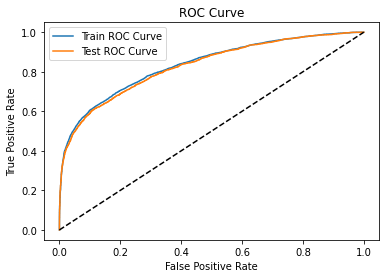

In [92]:
evaluator = ModelEvaluator(log_reg_model)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [93]:
# Make predictions using test set 
y_pred_log_train = log_reg_model.predict(X_train)

y_pred_log_test = log_reg_model.predict(X_test)

In [94]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_log_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_log_test))

Training Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80     24161
           1       0.79      0.65      0.71     20389

    accuracy                           0.76     44550
   macro avg       0.77      0.75      0.75     44550
weighted avg       0.77      0.76      0.76     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8098
           1       0.78      0.64      0.70      6752

    accuracy                           0.75     14850
   macro avg       0.76      0.74      0.75     14850
weighted avg       0.76      0.75      0.75     14850



>My Logistic Regression was able to achieve accuracy of 76 % for the training set and 75% for the testing set. The ROC-AUC looks really pretty at 84% for training set and 83% at the testing set. This looks pretty good but I will go ahead and do a GridSearch to see how well it can perform.

#### Logistic Regression GridSearchCV


In [95]:
log_params = {
    'logreg__solver':['liblinear', 'sag', 'saga']
}

In [96]:
log_reg_gs = GridSearchCV(estimator=log_reg_model, 
                          param_grid=log_params, 
                          cv=5, 
                          verbose=1)

In [97]:
# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
log_reg_gs.fit(X_train, y_train);

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.9min finished


Train Accuracy: 0.7617508417508417
Test Accuracy: 0.7548148148148148
Train ROC-AUC: 0.8355783546707892
Test ROC-AUC: 0.8292144661691672


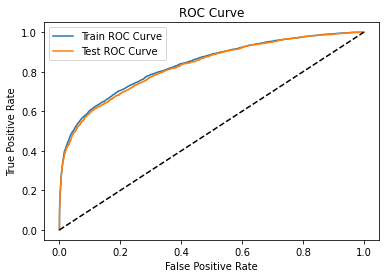

In [98]:
evaluator = ModelEvaluator(log_reg_gs)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [99]:
# Make predictions using test set 
y_pred_log_reg_gs_train = log_reg_gs.predict(X_train)

y_pred_log_reg_gs_test = log_reg_gs.predict(X_test)

In [100]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_log_reg_gs_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_log_reg_gs_test))

Training Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80     24161
           1       0.79      0.65      0.71     20389

    accuracy                           0.76     44550
   macro avg       0.77      0.75      0.75     44550
weighted avg       0.77      0.76      0.76     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8098
           1       0.78      0.64      0.70      6752

    accuracy                           0.75     14850
   macro avg       0.76      0.75      0.75     14850
weighted avg       0.76      0.75      0.75     14850



In [101]:
log_reg_gs.best_params_

{'logreg__solver': 'liblinear'}

>Liblinear is the best solver for this particular dataset. The train data and test data scores were almost the same, indicating that there is a good fit with little over/underfitting.

#### Next Iteration with GridSearch

>I will add te max_iter to see what is the best maximum the model can do.

In [102]:
# setting basic parameter
log_params2 = {
    'logreg__solver':['liblinear'],
    'logreg__max_iter':[100, 150, 200],
}

In [103]:
# Creating a GridSearchCV with log_reg_model as the estimator
log_reg_gs2 = GridSearchCV(estimator=log_reg_model, 
                           param_grid=log_params2, 
                           cv=5, 
                           verbose=1)

In [104]:
# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
log_reg_gs2.fit(X_train, y_train);

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.3min finished


Train Accuracy: 0.7617508417508417
Test Accuracy: 0.7548148148148148
Train ROC-AUC: 0.8355783546707892
Test ROC-AUC: 0.8292144661691672


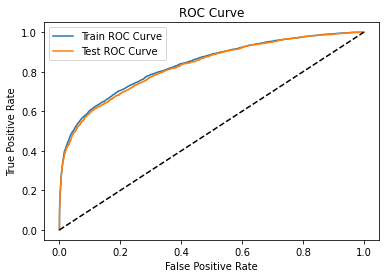

In [105]:
evaluator = ModelEvaluator(log_reg_gs2)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [106]:
# Make predictions using test set 
y_pred_log_reg_gs2_train = log_reg_gs2.predict(X_train)

y_pred_log_reg_gs2_test = log_reg_gs2.predict(X_test)

In [107]:
# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_log_reg_gs2_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_log_reg_gs2_test))

Training Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80     24161
           1       0.79      0.65      0.71     20389

    accuracy                           0.76     44550
   macro avg       0.77      0.75      0.75     44550
weighted avg       0.77      0.76      0.76     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8098
           1       0.78      0.64      0.70      6752

    accuracy                           0.75     14850
   macro avg       0.76      0.75      0.75     14850
weighted avg       0.76      0.75      0.75     14850



In [108]:
log_reg_gs2.best_params_

{'logreg__max_iter': 100, 'logreg__solver': 'liblinear'}

>The test and train results reflected back the same as the first GridSearch with the max iterations 100, and liblinear as the best solver. I will use these params to perform the final Logistic Regression Model. 

#### Final Logistic Regression Model

In [109]:
# setting a Pipeline
log_reg_final = Pipeline([
    ('ColTrans', ColTrans),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])

# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
log_reg_final.fit(X_train, y_train)

# Make predictions using test set 
y_pred_log_reg_final_train = log_reg_final.predict(X_train)

y_pred_log_reg_final_test = log_reg_final.predict(X_test)

# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_log_reg_final_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_log_reg_final_test))

Training Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80     24161
           1       0.79      0.65      0.71     20389

    accuracy                           0.76     44550
   macro avg       0.77      0.75      0.75     44550
weighted avg       0.77      0.76      0.76     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8098
           1       0.78      0.64      0.70      6752

    accuracy                           0.75     14850
   macro avg       0.76      0.75      0.75     14850
weighted avg       0.76      0.75      0.75     14850



Train Accuracy: 0.7617508417508417
Test Accuracy: 0.7548148148148148
Train ROC-AUC: 0.8355783546707892
Test ROC-AUC: 0.8292144661691672


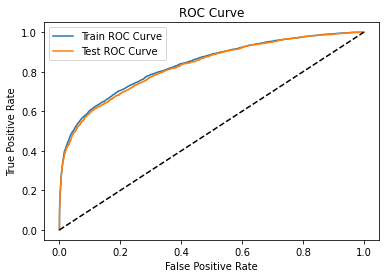

In [110]:
evaluator = ModelEvaluator(log_reg_final)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

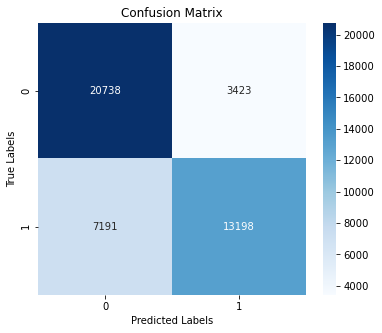

In [111]:
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_log_reg_final_train)

# Create a figure and axes for the confusion matrix plot
fig, ax = plt.subplots(figsize=(6,5))

# Create the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
# Display the plot
plt.show();

>This is not a great model, after running several GridSearches, the final model for logistic regression is just the same a the initial one.

### AdaBoost Model

In [112]:
# Instantiate the model in the Pipeline
ada_model = Pipeline([
    ('ColTrans', ColTrans),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=1, 
                               algorithm='SAMME.R', random_state=42))
])

# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
ada_model.fit(X_train, y_train)

# Make predictions using test set and train set
y_pred_ada_train = ada_model.predict(X_train)

y_pred_ada_test = ada_model.predict(X_test)

# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_ada_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_ada_test))

Training Report:
              precision    recall  f1-score   support

           0       0.75      0.85      0.80     24161
           1       0.79      0.66      0.72     20389

    accuracy                           0.76     44550
   macro avg       0.77      0.76      0.76     44550
weighted avg       0.77      0.76      0.76     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      8098
           1       0.78      0.65      0.71      6752

    accuracy                           0.76     14850
   macro avg       0.76      0.75      0.75     14850
weighted avg       0.76      0.76      0.75     14850



Train Accuracy: 0.7635465768799102
Test Accuracy: 0.7578451178451179
Train ROC-AUC: 0.839181037142629
Test ROC-AUC: 0.8322247795517939


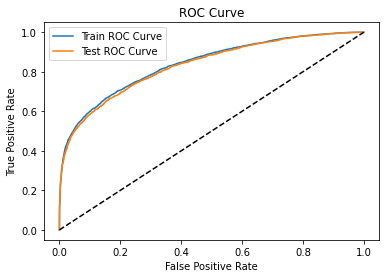

In [113]:
evaluator = ModelEvaluator(ada_model)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

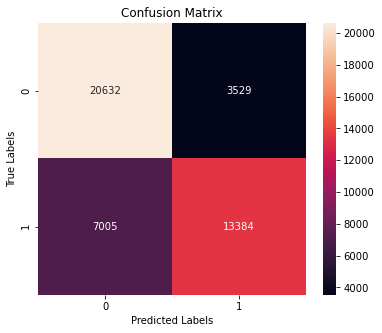

In [114]:
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_ada_train)

# Create a figure and axes for the confusion matrix plot
fig, ax = plt.subplots(figsize=(6,5))

# Create the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", cbar=True, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
# Display the plot
plt.show();

>The AdaBoost Model did not do much in terms of performance score for accuracy and ROC-AUC, when compared to the logistic regression model. 

### XGBoost Model

In [115]:
# Instantiate the model
xgb_model = Pipeline([
    ('ColTrans', ColTrans),
    ('xgb', xgboost.XGBClassifier(random_state=42))
])

# Convert the y_train and y_test to integers 
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions using test set and train set
y_pred_xgb_train = xgb_model.predict(X_train)

y_pred_xgb_test = xgb_model.predict(X_test)

# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_xgb_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_xgb_test))

Training Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     24161
           1       0.88      0.76      0.82     20389

    accuracy                           0.84     44550
   macro avg       0.85      0.84      0.84     44550
weighted avg       0.85      0.84      0.84     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      8098
           1       0.83      0.72      0.77      6752

    accuracy                           0.81     14850
   macro avg       0.81      0.80      0.80     14850
weighted avg       0.81      0.81      0.81     14850



Train Accuracy: 0.8449607182940516
Test Accuracy: 0.8078787878787879
Train ROC-AUC: 0.92612632398033
Test ROC-AUC: 0.8860761250803252


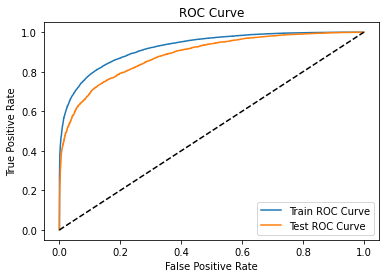

In [116]:
evaluator = ModelEvaluator(xgb_model)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

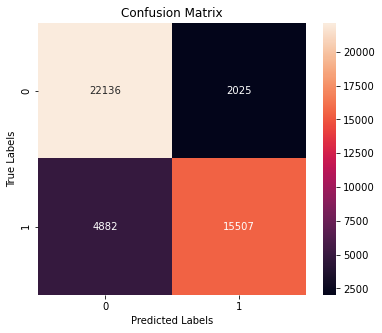

In [117]:
# Compute the confusion matrix
cm = confusion_matrix(y_train, y_pred_xgb_train)

# Create a figure and axes for the confusion matrix plot
fig, ax = plt.subplots(figsize=(6,5))

# Create the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", cbar=True, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
# Display the plot
plt.show();

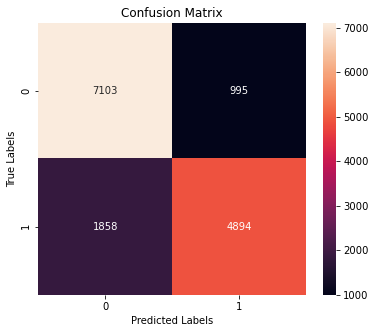

In [118]:

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb_test)

# Create a figure and axes for the confusion matrix plot
fig, ax = plt.subplots(figsize=(6,5))

# Create the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", cbar=True, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
# Display the plot
plt.show();


> **This is pretty good! My XGBoost model has 84% train accuracy and and 81% test accuracy. ROC-AUC score of 93% on the training data while the test results have an ROC-AUC score of 89%. The accuracy and ROC-AUC scores line up relatively well between train and test data indicating that there might be a slight overfitting but not significant ooverfitting.**

#### XGBoost with GridSearchCV

In [119]:
# setting basic parameter
xgb_params2 = [{'xgb__eta': [0.1, 0.2, 0.3, 0.4],
         'xgb__gamma': [len(range(1, 50))],
         'xgb__max_depth': [len(range(1, 10))],
         'xgb__subsample': [len(range(0,1))],
         'xgb__booster': ['gbtree', 'dart']}]

# Creating a GridSearchCV with xgb_model as the estimator
xgb_gs2 = GridSearchCV(estimator=xgb_model, 
                       param_grid=xgb_params2, 
                       cv=5, 
                       verbose=1)

# Fitting the model
xgb_gs2.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 49.9min finished


Train Accuracy: 0.7767003367003367
Test Accuracy: 0.7674747474747474
Train ROC-AUC: 0.8558722806644002
Test ROC-AUC: 0.8467927214782422


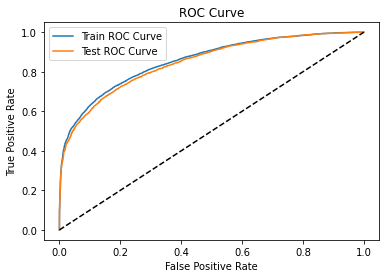

In [120]:
evaluator = ModelEvaluator(xgb_gs2)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [121]:
# Make predictions using test set and train set
y_pred_xgb2_train = xgb_gs2.predict(X_train)

y_pred_xgb2_test = xgb_gs2.predict(X_test)

# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_xgb2_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_xgb2_test))

Training Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81     24161
           1       0.84      0.64      0.72     20389

    accuracy                           0.78     44550
   macro avg       0.79      0.77      0.77     44550
weighted avg       0.79      0.78      0.77     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.81      8098
           1       0.82      0.63      0.71      6752

    accuracy                           0.77     14850
   macro avg       0.78      0.76      0.76     14850
weighted avg       0.78      0.77      0.76     14850



In [122]:
xgb_gs2.best_params_

{'xgb__booster': 'gbtree',
 'xgb__eta': 0.4,
 'xgb__gamma': 49,
 'xgb__max_depth': 9,
 'xgb__subsample': 1}

>My XGBoost with GridSearchCV model has 86% ROC-AUC in the train and an ROC-AUC score of 85% for the test set. This is pretty good. But the accuracy went down to 78% fot training set and 77% for the test set. The accuracy and ROC-AUC scores line up relatively well between train and test data indicating that there might be a slight overfitting but not significant.

### Stack Model


>I decided to created a stacking classifier using the best models that I identified during my modeling proecess to see how best they can work when combined together.

In [123]:
# setting basic parameter
estimators = [
    ('lr', LogisticRegression(random_state=42, solver='liblinear')), 
    ('tree', DecisionTreeClassifier()),
    ('rfc', RandomForestClassifier(criterion='entropy', max_depth=31, 
                                  max_features='auto', random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=200, learning_rate=1, 
                               algorithm='SAMME.R', random_state=42)),
    ('xgb', xgboost.XGBClassifier(booster='gbtree', max_depth=10,
                                  objective='binary:logistic', random_state=42)),
]



# instantiate the stack model
stack_model = Pipeline([
    ('ColTrans', ColTrans),
    ('stack', StackingClassifier(estimators))
])

# Convert the y_train and y_test to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Fit the model 
stack_model.fit(X_train, y_train);


Train Accuracy: 0.9599775533108866
Test Accuracy: 0.822020202020202
Train ROC-AUC: 0.9953919150304809
Test ROC-AUC: 0.9032926972636155


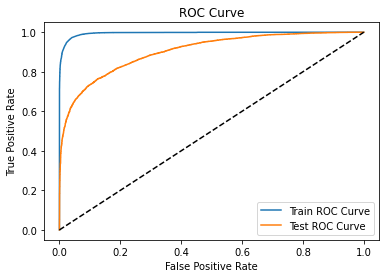

In [124]:
evaluator = ModelEvaluator(stack_model)

# Assuming you have your train and test data 'X_train', 'y_train', 'X_test', and 'y_test'
train_accuracy, test_accuracy, train_roc_auc, test_roc_auc = evaluator.evaluate(X_train, y_train, X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train ROC-AUC:", train_roc_auc)
print("Test ROC-AUC:", test_roc_auc)

# Plot ROC curves
evaluator.plot_roc_curve(X_train, y_train, X_test, y_test)

In [125]:
# Make predictions using test set and train set
y_pred_stack_train = stack_model.predict(X_train)

y_pred_stack_test = stack_model.predict(X_test)

# Print classification report
print("Training Report:")
print(classification_report(y_train, y_pred_stack_train))
print('-----------------------------------------------------------------------')
print('\n')
print("Testing Report:")
print(classification_report(y_test, y_pred_stack_test))

Training Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     24161
           1       0.98      0.94      0.96     20389

    accuracy                           0.96     44550
   macro avg       0.96      0.96      0.96     44550
weighted avg       0.96      0.96      0.96     44550

-----------------------------------------------------------------------


Testing Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      8098
           1       0.83      0.77      0.80      6752

    accuracy                           0.82     14850
   macro avg       0.82      0.82      0.82     14850
weighted avg       0.82      0.82      0.82     14850



 ### <span style='color:green'>Results Interpretation</SPAN>

In this project I run several models to analyze and predict Tanzanian Water Wells that are functional, non-funtional and those in need of repair. I considered several factors like accuracy, that measure how accurate the model can predict and ROC-AUC that measure how accurate the model identify the true positive and true negatives. 

Having said that The XGBoost Classifier Model has the best accuracy score of 81% on the testing set and 84% on the training set and ROC-AUC of 89% on the test set and 93% on the training set. 

### <span style='color:cyan'>Conclusion</SPAN>

I first made a base model for each type of model classifier, trained and fitted with default parameters as a base. Thereafter, I selected key parameters to tune using sklearn GridSearchCV and the best parameters were used to run the final model. I compared the performance to the base model of each type, as well as between different model types. I evaluated the models using a classification report, a confusion matrix, ROC plots with AUC scores, and applied feature importances.

### <span style='color:yellow'>Recommendation</SPAN>

To get better results, especially on the wells that need repair class, more features need to be included during the data collection process. Adding information in the reporting of wells such as when the well was last serviced, what kind of repairs have been done on the wells, or if any parts have been replaced in the reporting of wells could prove to be useful for better predictions.

### Next Step

>The next steps in the project would be to implement the model and continue fine-tuning it as new data becomes available. With the introduction of new data, the model can learn and improve its predictions over time. This iterative process allows for ongoing refinement and optimization of the model's performance.

>By utilizing this model, the detection rate of wells needing repair would be significantly improved. This improvement would result in a reduction in the cost of well maintenance and a decrease in the manpower required for inspections. The model's ability to accurately identify wells in need of repair would enable more efficient allocation of resources and timely intervention, ultimately leading to cost savings and improved operational effectiveness.